# Classification tree

## Iris dataset

This is an example from [sklearn](https://scikit-learn.org/stable/modules/tree.html#classification).

Download and visualize Iris dataset:

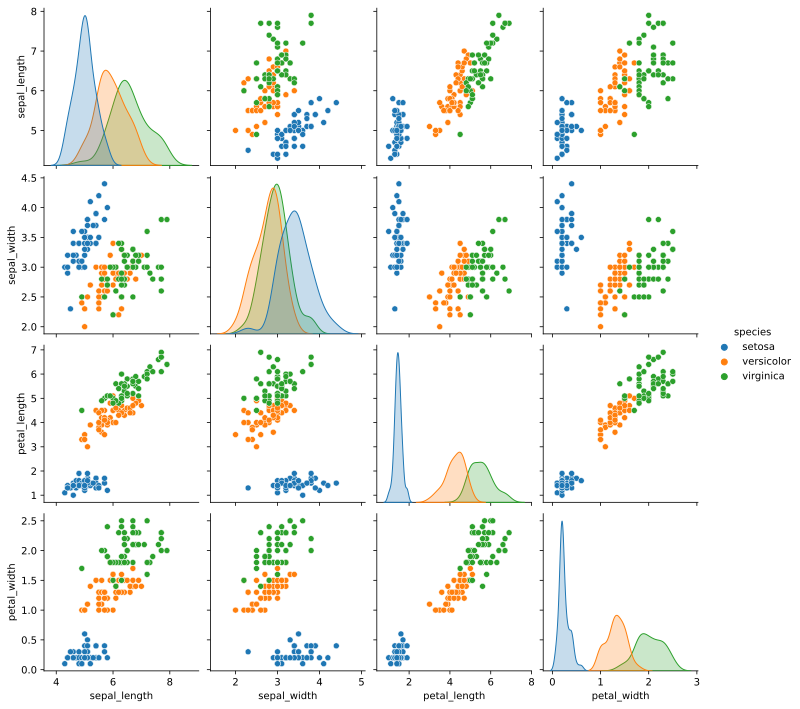

In [35]:
import seaborn as sns
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species");

Fit decision tree classifier:

In [36]:
from sklearn import tree

y = iris['species']
X = iris.drop("species", axis=1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.score(X, y)

1.0

Plot the tree:

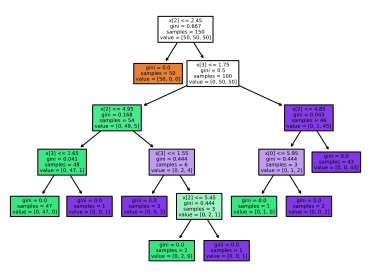

In [37]:
tree.plot_tree(clf, filled=True);

A prettier tree can be drawn by `graphviz`:

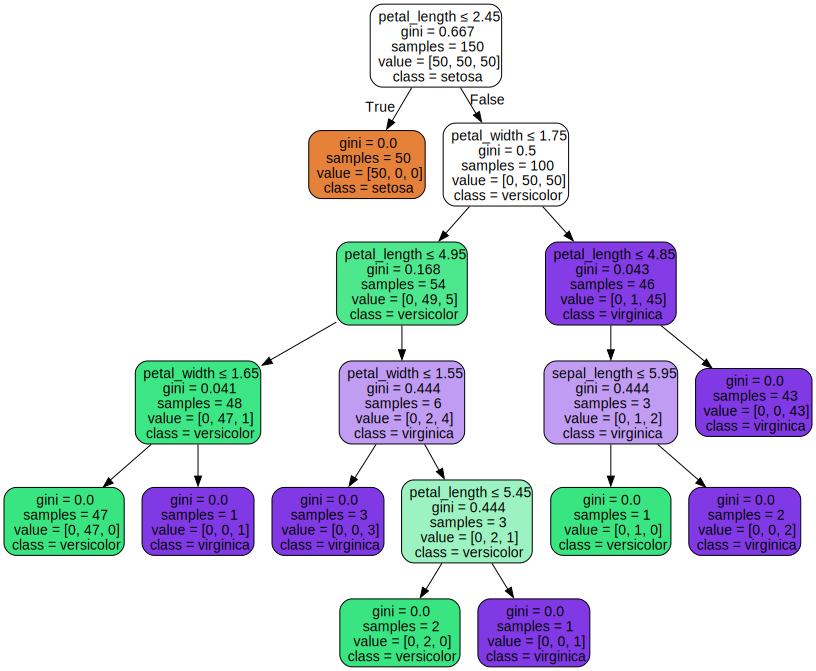

In [38]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.columns[:-1],  
                     class_names=['setosa', 'versicolor', 'virginica'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Depth equal to $2$ is enough for this toy dataset:

In [42]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)
clf.score(X, y)

0.96

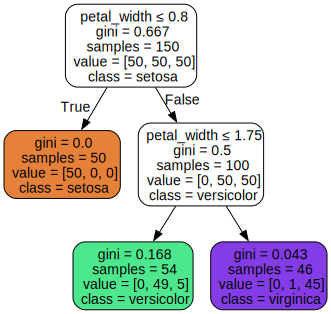

In [43]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.columns[:-1],  
                     class_names=['setosa', 'versicolor', 'virginica'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## MNIST

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'svg'

X, Y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

X = X.astype(float).values / 255
Y = Y.astype(int).values

Visualize data:

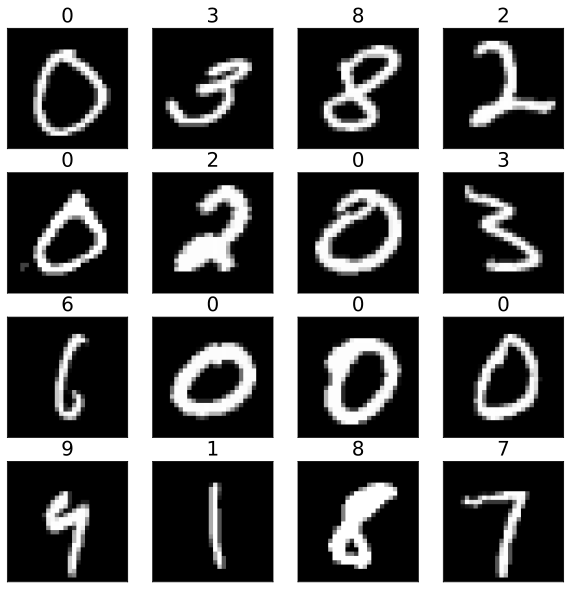

In [45]:
def plot_digits(X, y_true, y_pred=None, n=4, random_state=123):
    np.random.seed(random_state)
    indices = np.random.choice(np.arange(X.shape[0]), size=n*n, replace=False)
    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
        # plt.imshow(train_images[i], cmap=plt.cm.binary)
        if y_pred is None:
            title = str(y_true[indices[i]])
        else:
            title = f"y={y_true[indices[i]]}, ŷ={y_pred[indices[i]]}"
        plt.title(title, size=20)
    plt.show()

plot_digits(X, Y, random_state=11)

Split into train and test:

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=10000)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

Fit a decision tree model:

In [47]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy score:

In [48]:
print("Train accuracy:", DT.score(X_train, y_train))
print("Test accuracy:", DT.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.8735


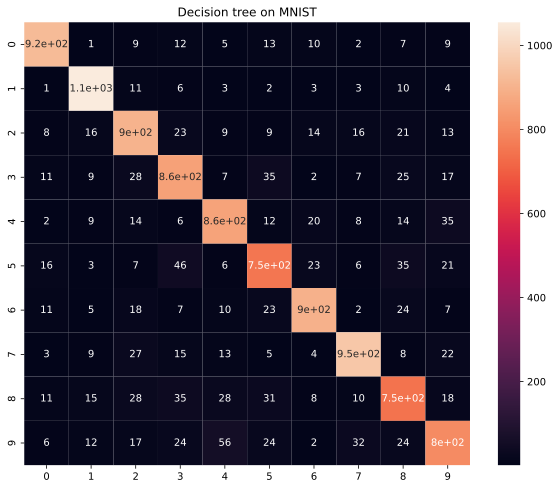

In [32]:
plt.figure(figsize=(10, 8))
plt.title("Decision tree on MNIST")
sns.heatmap(confusion_matrix(y_test, DT.predict(X_test)), annot=True);

Limit the tree depth and size of leaves:

In [71]:
DT = DecisionTreeClassifier(max_depth=15, min_samples_leaf=3)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=3)

In [72]:
print("Train accuracy:", DT.score(X_train, y_train))
print("Test accuracy:", DT.score(X_test, y_test))

Train accuracy: 0.9614666666666667
Test accuracy: 0.8787


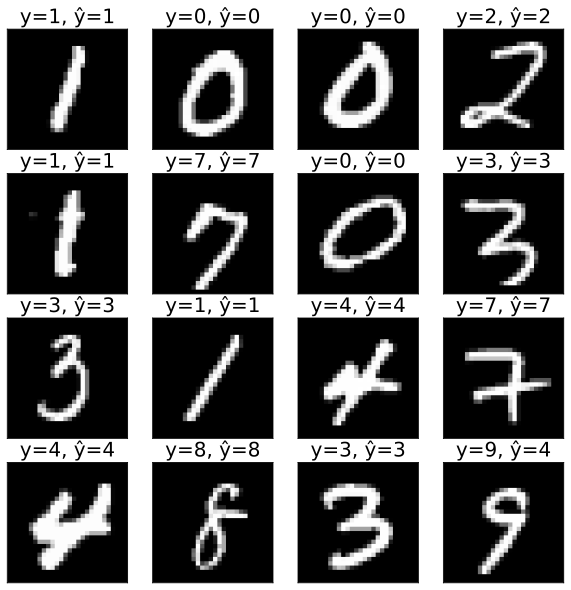

In [73]:
plot_digits(X_test, y_test, DT.predict(X_test))

## Splitting conditions

Each non-terminal node contains **splitting condition**, depending on which we are going to the left or to the right subtree. The splitting condition usually consists in comparing value of some feature $x_j$ with a threshold $t$:

$$
    \mathbb I[x_j \leqslant t], \quad 1\leqslant j \leqslant d.
$$

According to the splitting condition, the training sample $X$ is split into two subsamples $X_l$ and $X_r$, $X = X_l \cup X_r$.

## ChatGPT suggestions

2. Node Splitting

At each internal node, the tree algorithm selects a feature and a splitting criterion to divide the data into two or more child nodes. The goal is to create splits that maximize the purity or homogeneity of the class labels within each node.

3. Leaf Nodes

The leaf nodes are the terminal nodes of the tree. Each leaf node contains a predicted class label, representing the majority class of the training samples in that node.

4. Predictive Modeling

To make predictions for new data, you traverse the tree from the root to a leaf node based on the feature values of the new data point. The class label in the selected leaf node is the predicted class for that data point.

5. Recursive Partitioning

The process of building a classification tree is recursive. The algorithm starts with the entire dataset and recursively splits it into subsets by choosing the best feature and split criterion at each node, continuing until a stopping condition is met.

6. Stopping Criteria

Stopping criteria are used to determine when to stop growing the tree. Common stopping criteria include limiting the tree depth, setting a minimum number of samples per leaf, or using a minimum impurity reduction threshold.

7. Impurity Measures

In classification trees, impurity measures such as Gini impurity, entropy, or misclassification rate are used to evaluate how well a split increases the purity or homogeneity of class labels. The split that minimizes impurity is selected.

8. Pruning

After building a classification tree, it may be pruned to reduce overfitting. Pruning involves removing nodes that do not significantly improve the tree's performance on a validation dataset.

9. Visualization

Classification trees can be visualized graphically, making it easy to interpret and understand the model's decision-making process.

10. Ensemble Methods

Classification trees are often used as building blocks in ensemble methods like Random Forests and Gradient Boosting, which combine multiple trees to improve predictive accuracy and reduce overfitting.

11. Advantages

Classification trees are interpretable, and their decision-making process is easy to understand. They can capture complex decision boundaries and interactions between features.

12. Limitations

They can be prone to overfitting, especially if the tree is allowed to grow deep. Single trees may not generalize well on certain types of data. Ensembling methods can mitigate these limitations.

Classification trees are widely used in various domains, including healthcare, finance, and natural language processing, for tasks such as spam email detection, disease diagnosis, and sentiment analysis. Proper tuning of hyperparameters and consideration of potential overfitting are essential when working with classification trees.